## Importing Libraries


*   **pandas:** Used for data manipulation and analysis
*   **nltk:** Used for Natural Language Processing for English Language
*   **string:** Used for String and Text manipulation




In [117]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
nltk.download("punkt")
from wordcloud import WordCloud
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [128]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importing Data & Analysing Data
[Qoura Data Set](https://huggingface.co/datasets/toughdata/quora-question-answer-dataset)

In [118]:
# Loading hudding face data-set from the specified link
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)

# Viewing first 5 rows of data-set to understand the sample
df.head(5)

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...


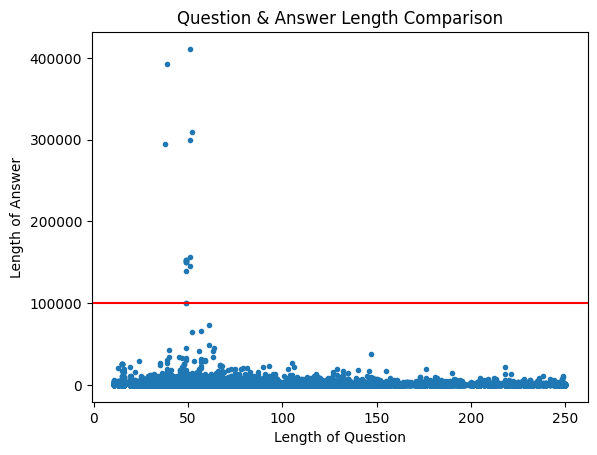

In [119]:
# Computing the lengths of question and answer
ques_len = np.array([len(sent) for sent in df.question])
ans_len = np.array([len(sent) for sent in df.answer])

# Plotting question length against answer length to identify data distribution
len_comparison = np.vstack((ques_len, ans_len)).T
plt.plot(ques_len, ans_len, '.')
plt.axhline(y = 100000, color = 'r', linestyle = '-')
plt.xlabel("Length of Question")
plt.ylabel("Length of Answer")
plt.title("Question & Answer Length Comparison")
plt.show()

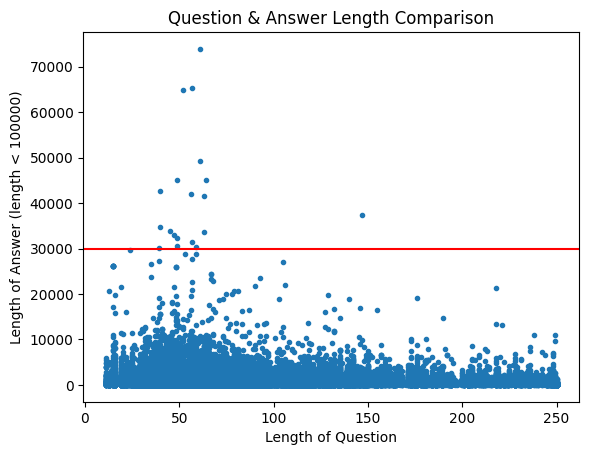

In [120]:
# Printing elements beyond 100000
idx = ans_len <= 100000
plt.plot(ques_len[idx], ans_len[idx], '.')
plt.axhline(y = 30000, color = 'r', linestyle = '-')
plt.xlabel("Length of Question")
plt.ylabel("Length of Answer (length < 100000)")
plt.title("Question & Answer Length Comparison")
plt.show()

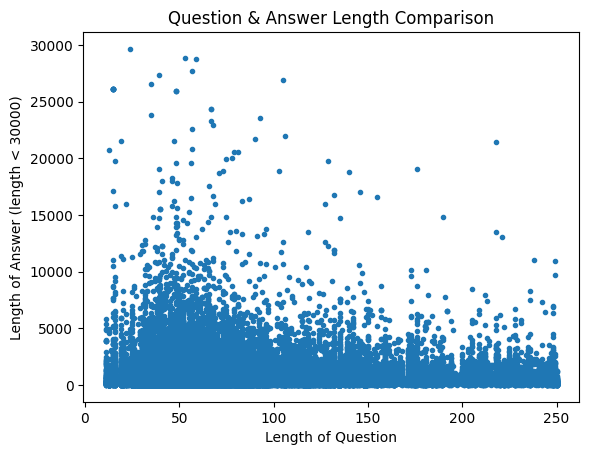

Percentage of points below 30k: 99.93617247615333 %


In [121]:
# Printing elements beyond 30000
idx = ans_len <= 30000
plt.plot(ques_len[idx], ans_len[idx], '.')
plt.xlabel("Length of Question")
plt.ylabel("Length of Answer (length < 30000)")
plt.title("Question & Answer Length Comparison")
plt.show()

# Percentage of data below 30,000 answer leng5th
p = (ans_len[idx].size) / (ans_len.size)
print("Percentage of points below 30k:", p*100, "%")

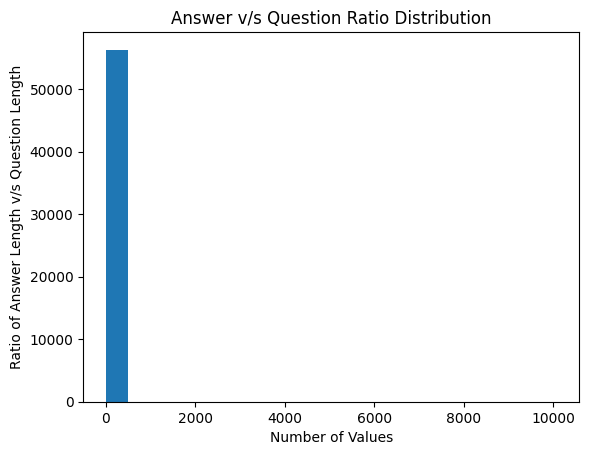

In [122]:
# Plotting the ratio of answer length with question length
length_ratio = np.sort(ans_len/ques_len)

# Plotting the histogram for ratio data
plt.hist(length_ratio, 20)
plt.xlabel("Number of Values")
plt.ylabel("Ratio of Answer Length v/s Question Length")
plt.title("Answer v/s Question Ratio Distribution")
plt.show()

Max Vaue: 10076.461538461539
Median Vaue: 6.043290854572714


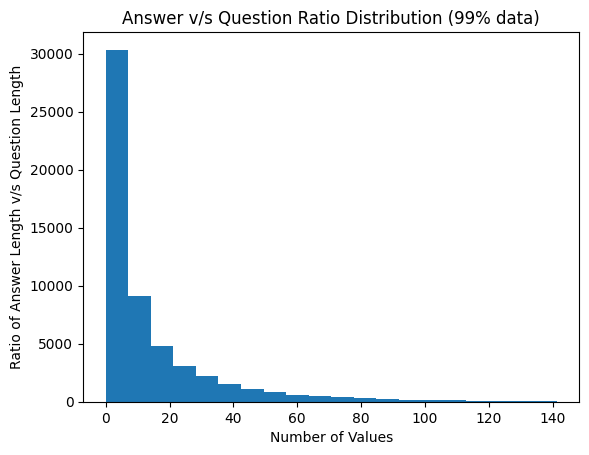

In [123]:
# Computing the max and median of the ratio distribution
max_value = np.max(length_ratio)
print('Max Vaue:', max_value)
med_value = np.median(length_ratio)
print('Median Vaue:', med_value)

# Plotting the histogram for 98% ratio data
idx_99 = int(0.99*length_ratio.size)
plt.hist(length_ratio[1:idx_99], 20)
plt.xlabel("Number of Values")
plt.ylabel("Ratio of Answer Length v/s Question Length")
plt.title("Answer v/s Question Ratio Distribution (99% data)")
plt.show()

In [124]:
# Tokenized Sentence
tokenized_ques = []
tokenized_ans = []

# Stemmed Words
stemmed_ques = []
stemmed_ans = []

# Bag of Words with frequency for input words
all_words = []
all_stemmed_words = []

# Punctuation Translator to remove punctuation marks with space
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

# Defining the porter stemmer for stemming words
ps = PorterStemmer()

# Tokenizing and Stemming Words in Question
for i in range(0, df.question.size):
  # Processing Question
  ques = df.question[i]
  # Remove Punctuation Marks from sentences
  ques = ques.translate(translator)

  # Tokenizing the sentence and converting words to lower case
  ques = [token.lower() for token in ques.split()]
  # Adding tokenized sentence to list
  tokenized_ques.append(ques)
  # Adding tokens to all_words
  all_words.extend(ques)

  # Stemming the tokens
  ques = [ps.stem(token) for token in ques]
  # Adding stemmed tokens to list
  stemmed_ques.append(ques)
  # Adding stemmed tokens to all_stemmed_words
  all_stemmed_words.extend(ques)

df.insert(1, "tokenized_question", tokenized_ques, True)
df.insert(2, "stemmed_question", stemmed_ques, True)

# Tokenizing and Stemming Words in Answer
for i in range(0, df.answer.size):
  # Processing Answer
  ans = df.answer[i]
  # Remove Punctuation Marks from sentences
  ans = ans.translate(translator)

  # Tokenizing the sentence and converting words to lower case
  ans = [token.lower() for token in ans.split()]
  # Adding tokenized sentence to list
  tokenized_ans.append(ans)

  # Stemming the tokens
  ans = [ps.stem(token) for token in ans]
  # Adding stemmed tokens to list
  stemmed_ans.append(ans)

df.insert(4, "tokenized_answer", tokenized_ans, True)
df.insert(5, "stemmed_answer", stemmed_ans, True)
df.head(5)

,question,tokenized_question,stemmed_question,answer,tokenized_answer,stemmed_answer
0,Why whenever I get in the shower my girlfriend...,"[why, whenever, i, get, in, the, shower, my, g...","[whi, whenev, i, get, in, the, shower, my, gir...",Isn’t it awful? You would swear that there was...,"[isn’t, it, awful, you, would, swear, that, th...","[isn’t, it, aw, you, would, swear, that, there..."
1,"What is a proxy, and how can I use one?","[what, is, a, proxy, and, how, can, i, use, one]","[what, is, a, proxi, and, how, can, i, use, one]",A proxy server is a system or router that prov...,"[a, proxy, server, is, a, system, or, router, ...","[a, proxi, server, is, a, system, or, router, ..."
2,"What song has the lyrics ""someone left the cak...","[what, song, has, the, lyrics, someone, left, ...","[what, song, ha, the, lyric, someon, left, the...",MacArthur's Park\n,"[macarthur, s, park]","[macarthur, s, park]"
3,I am the owner of an adult website called http...,"[i, am, the, owner, of, an, adult, website, ca...","[i, am, the, owner, of, an, adult, websit, cal...",Don't let apps that are liers put adds on your...,"[don, t, let, apps, that, are, liers, put, add...","[don, t, let, app, that, are, lier, put, add, ..."
4,Does the Bible mention anything about a place ...,"[does, the, bible, mention, anything, about, a...","[doe, the, bibl, mention, anyth, about, a, pla...",St. John in the book of Revelation mentions an...,"[st, john, in, the, book, of, revelation, ment...","[st, john, in, the, book, of, revel, mention, ..."


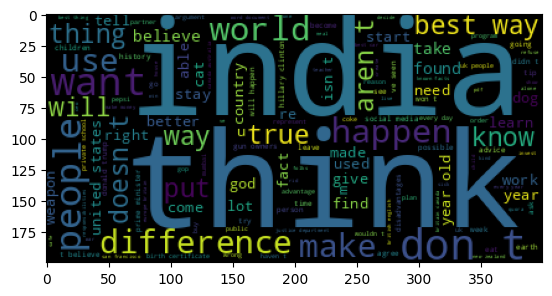

In [125]:
# Word Cloud with tokenized Words
wc = WordCloud().generate(' '.join(word for word in all_words))
plt.imshow(wc)

In [134]:
# Getting stop words
stops = set(stopwords.words('english'))

# removed stops from question
removed_stops = []

# Remove stop words from Stemmed Question
for i in range(0, df.stemmed_question.size):
  ques = df.stemmed_question[i]
  ques = [token for token in ques if token not in stops]
  removed_stops.append(ques)

df.insert(3, "setmmed_nostop_answer", removed_stops, True)
df.head(5)

,question,tokenized_question,stemmed_question,setmmed_nostop_answer,answer,tokenized_answer,stemmed_answer
0,Why whenever I get in the shower my girlfriend...,"[why, whenever, i, get, in, the, shower, my, g...","[whi, whenev, i, get, in, the, shower, my, gir...","[whi, whenev, get, shower, girlfriend, want, j...",Isn’t it awful? You would swear that there was...,"[isn’t, it, awful, you, would, swear, that, th...","[isn’t, it, aw, you, would, swear, that, there..."
1,"What is a proxy, and how can I use one?","[what, is, a, proxy, and, how, can, i, use, one]","[what, is, a, proxi, and, how, can, i, use, one]","[proxi, use, one]",A proxy server is a system or router that prov...,"[a, proxy, server, is, a, system, or, router, ...","[a, proxi, server, is, a, system, or, router, ..."
2,"What song has the lyrics ""someone left the cak...","[what, song, has, the, lyrics, someone, left, ...","[what, song, ha, the, lyric, someon, left, the...","[song, ha, lyric, someon, left, cake, rain]",MacArthur's Park\n,"[macarthur, s, park]","[macarthur, s, park]"
3,I am the owner of an adult website called http...,"[i, am, the, owner, of, an, adult, website, ca...","[i, am, the, owner, of, an, adult, websit, cal...","[owner, adult, websit, call, http, matureanall...",Don't let apps that are liers put adds on your...,"[don, t, let, apps, that, are, liers, put, add...","[don, t, let, app, that, are, lier, put, add, ..."
4,Does the Bible mention anything about a place ...,"[does, the, bible, mention, anything, about, a...","[doe, the, bibl, mention, anyth, about, a, pla...","[doe, bibl, mention, anyth, place, heaven, hell]",St. John in the book of Revelation mentions an...,"[st, john, in, the, book, of, revelation, ment...","[st, john, in, the, book, of, revel, mention, ..."


In [135]:
df.to_csv('/content/gdrive/My Drive/Indigo-HackToHire/processed_data.csv')